# **CSCI 6505 - PROJECT: MUSIC MOODS CLASSIFICATION**

**Group Number:** 12 \
**Group Name:** Music Moods Classification \
**Team Members:** 

1.   Tanvi Paruthi - B00875949
2.   Tasnim Khan - B00882598
3.   Nikita Kothari - B00893710
4.   Naga Pavan Srivathsav Chevuru – B00893685

## **Brief Overview and Motivation**

The dataset for our project "Songs mood Classification" is extracted from Spotify using Spotify public APIs. This labelled dataset will be our ground truth. The explanation of each audio features have been referred from Spotify Webpage and have also been listed at the end of this notebook for reference.

We were surprised to see the Spotify Developer's API and the work that is has done in music, and all of us wanted to explore the numerous playlists and test the models that we have learnt in CSCI 6505 course. This was our motivation for our Machine Learning Project.

We have performed the exploratory analysis on the dataset and plotted different visualisation for understanding the correlation between the datasets and understand the patterns on how they classify into moods.


## **Library Imports**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model, metrics, ensemble, tree, model_selection
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
#from sklearn.learning_curve import learning_curve
#from sklearn.cross_validation import cross_val_score

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

## **Loading & Analyzing Dataset**

### **Mount Drive and read dataset**

In [3]:
# # Mount the drive
# from google.colab import drive
# drive.mount("/content/gdrive/")

In [4]:
# Read the dataset
df = pd.read_csv("dataset (1).csv")

### **Data Exploration and Cleaning**

In [5]:
# Print columns and count of records
print("Total number of records: ",df.count(axis=0))

Total number of records:  uri                 36406
acousticness        36406
valence             36406
danceability        36406
energy              36406
key                 36406
instrumentalness    36406
liveness            36406
loudness            36406
speechiness         36406
tempo               36406
duration            36406
h/s                 36406
dtype: int64


In [6]:
# Unique Classes/Labels
print("Total number of unique moods in the dataset: ",df.label.unique())

AttributeError: ignored

In [8]:
# Datasets count per label
print(df.groupby('h/s').size())

h/s
h    18160
s    18246
dtype: int64


In [9]:
df

,uri,acousticness,valence,danceability,energy,key,instrumentalness,liveness,loudness,speechiness,tempo,duration,h/s
0,spotify:track:7BVwi9cIzSc6tpyxsp47vJ,0.047000,0.272,0.595,0.723,7,0.028600,0.0995,-8.256,0.0349,108.043,223640,h
1,spotify:track:2fpDrL2Vpee0JnM6AoUFvl,0.000921,0.178,0.486,0.638,0,0.000000,0.0780,-6.231,0.0323,144.458,199827,h
2,spotify:track:0HL3y3bsKSARBSP0qaImwb,0.271000,0.372,0.639,0.666,0,0.000000,0.1110,-7.775,0.0636,98.384,213733,h
3,spotify:track:5g7rJvWYVrloJZwKiShqlS,0.107000,0.133,0.359,0.649,3,0.012400,0.0555,-7.060,0.0349,111.709,278373,h
4,spotify:track:75nZ4W6quZhI55LKiqCXWh,0.796000,0.332,0.584,0.474,9,0.000003,0.1150,-7.981,0.0258,101.457,280795,h
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36401,spotify:track:3G6hD9B2ZHOsgf4WfNu7X1,0.167000,0.416,0.690,0.578,6,0.000000,0.3050,-7.436,0.0929,99.961,193059,s
36402,spotify:track:6qc34bnVOyqGDPni8H5W0U,0.260000,0.243,0.561,0.543,1,0.000000,0.1240,-8.498,0.0324,139.803,240867,s
36403,spotify:track:0UkZ0epPTahsPgLXacC5EG,0.439000,0.386,0.451,0.452,1,0.000000,0.4780,-9.363,0.0574,57.523,190619,s
36404,spotify:track:68zNuCEl9UHTbcBltW2uDv,0.053100,0.347,0.700,0.904,2,0.000008,0.1050,-4.030,0.0431,103.039,181102,s


In [10]:
df.describe()

,acousticness,valence,danceability,energy,key,instrumentalness,liveness,loudness,speechiness,tempo,duration
count,36406.000000,36406.000000,36406.000000,36406.000000,36406.000000,36406.000000,36406.000000,36406.000000,36406.000000,36406.000000,3.640600e+04
mean,0.343512,0.448094,0.606010,0.574123,5.187222,0.073745,0.169915,-8.164265,0.089770,118.843662,2.148830e+05
std,0.325136,0.242704,0.156318,0.233050,3.614814,0.215905,0.132061,4.147386,0.097411,28.035433,6.485185e+04
min,0.000000,0.000000,0.000000,0.000769,0.000000,0.000000,0.014100,-43.274000,0.000000,0.000000,1.648300e+04
25%,0.046400,0.246000,0.503000,0.405000,2.000000,0.000000,0.094600,-9.904500,0.035400,97.849500,1.791200e+05
50%,0.225000,0.423000,0.618000,0.591500,5.000000,0.000005,0.117000,-7.224000,0.048400,119.786000,2.086660e+05
75%,0.630000,0.632000,0.719000,0.759000,8.000000,0.001530,0.194000,-5.408000,0.094475,135.826000,2.410228e+05
max,0.996000,0.993000,0.979000,0.999000,11.000000,0.994000,0.989000,1.585000,0.959000,222.083000,3.471000e+06


In [11]:
# Dropping unwanted columns
# Removing duplicate URI's
cleaned_df = df.drop(['uri','key','duration'], axis=1)

# Dropping duplicates
cleaned_df = cleaned_df.drop_duplicates()
print("Total number of records: ",cleaned_df.count(axis=0))

Total number of records:  acousticness        24655
valence             24655
danceability        24655
energy              24655
instrumentalness    24655
liveness            24655
loudness            24655
speechiness         24655
tempo               24655
h/s                 24655
dtype: int64


### **Data Visualization: Identifying correlation between all the features**

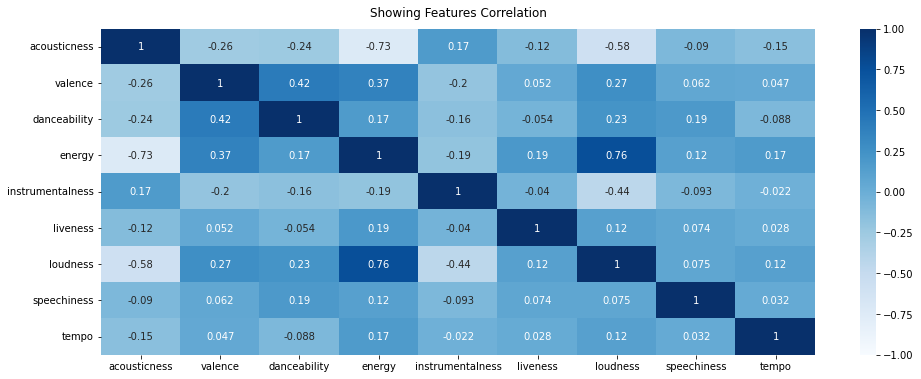

In [12]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(cleaned_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Showing Features Correlation', fontdict={'fontsize':12}, pad=12)
plt.show()

**Insights from the heatmap:**

1. The features which are highly correlated to danceability are: energy, loudness, valence.
2. The features which are highly correlated to energy are: valence, loudness, danceability.
3. The features which are highly correlated to key are: None
4. The features which are highly correlated to loudness are: valence, energy.
5. The features which are highly correlated to mode: None
6. The features which are highly correlated to acousticness are: instrumentalness.

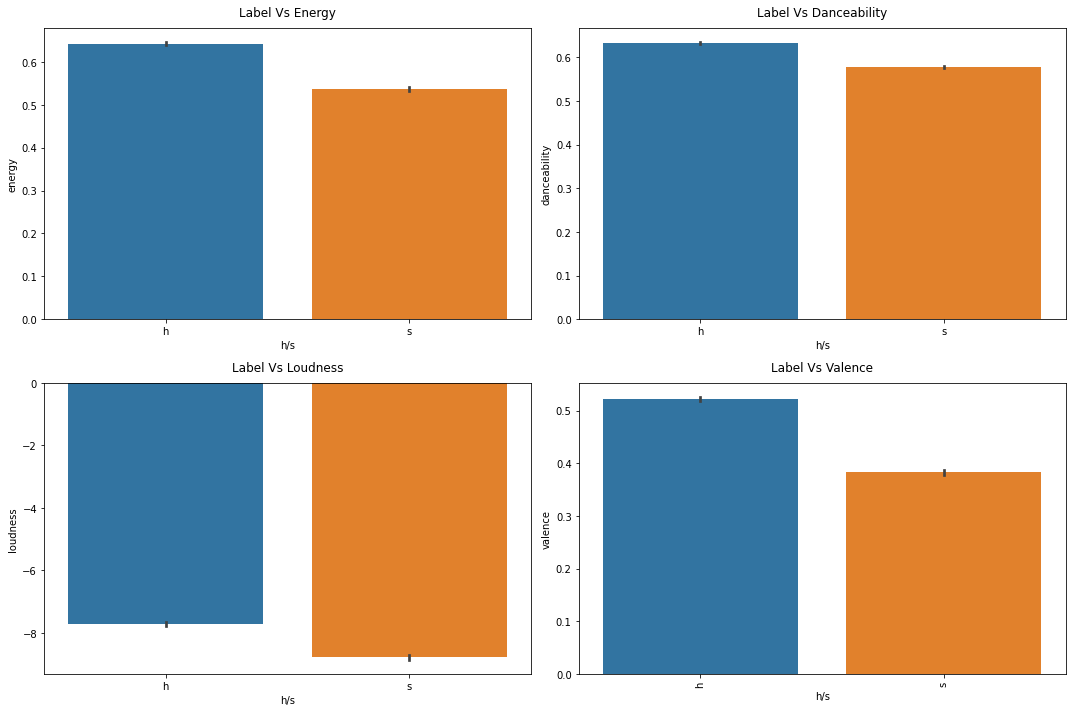

In [14]:
# Bar plots for highly correlated features

fig, ax = plt.subplots(2,2,figsize=(15,10))
map1 = sns.barplot(x = 'h/s', y = 'energy', data = cleaned_df, ax=ax[0][0])
map1.set_title('Label Vs Energy', fontdict={'fontsize':12}, pad=12)
map2 = sns.barplot(x = 'h/s', y = 'danceability', data = cleaned_df, ax=ax[0][1])
map2.set_title('Label Vs Danceability', fontdict={'fontsize':12}, pad=12)
map3 = sns.barplot(x = 'h/s', y = 'loudness', data = cleaned_df, ax=ax[1][0])
map3.set_title('Label Vs Loudness', fontdict={'fontsize':12}, pad=12)
map4 = sns.barplot(x = 'h/s', y = 'valence', data = cleaned_df, ax=ax[1][1])
map4.set_title('Label Vs Valence', fontdict={'fontsize':12}, pad=12)
plt.xticks(rotation=90)

fig.tight_layout()

In [15]:
# Extracting a samaller chunk of this dataset - 50 records for each label
small_df = cleaned_df.groupby('h/s').head(50).reset_index(drop=True)
print(small_df.groupby('h/s').size())

h/s
h    50
s    50
dtype: int64


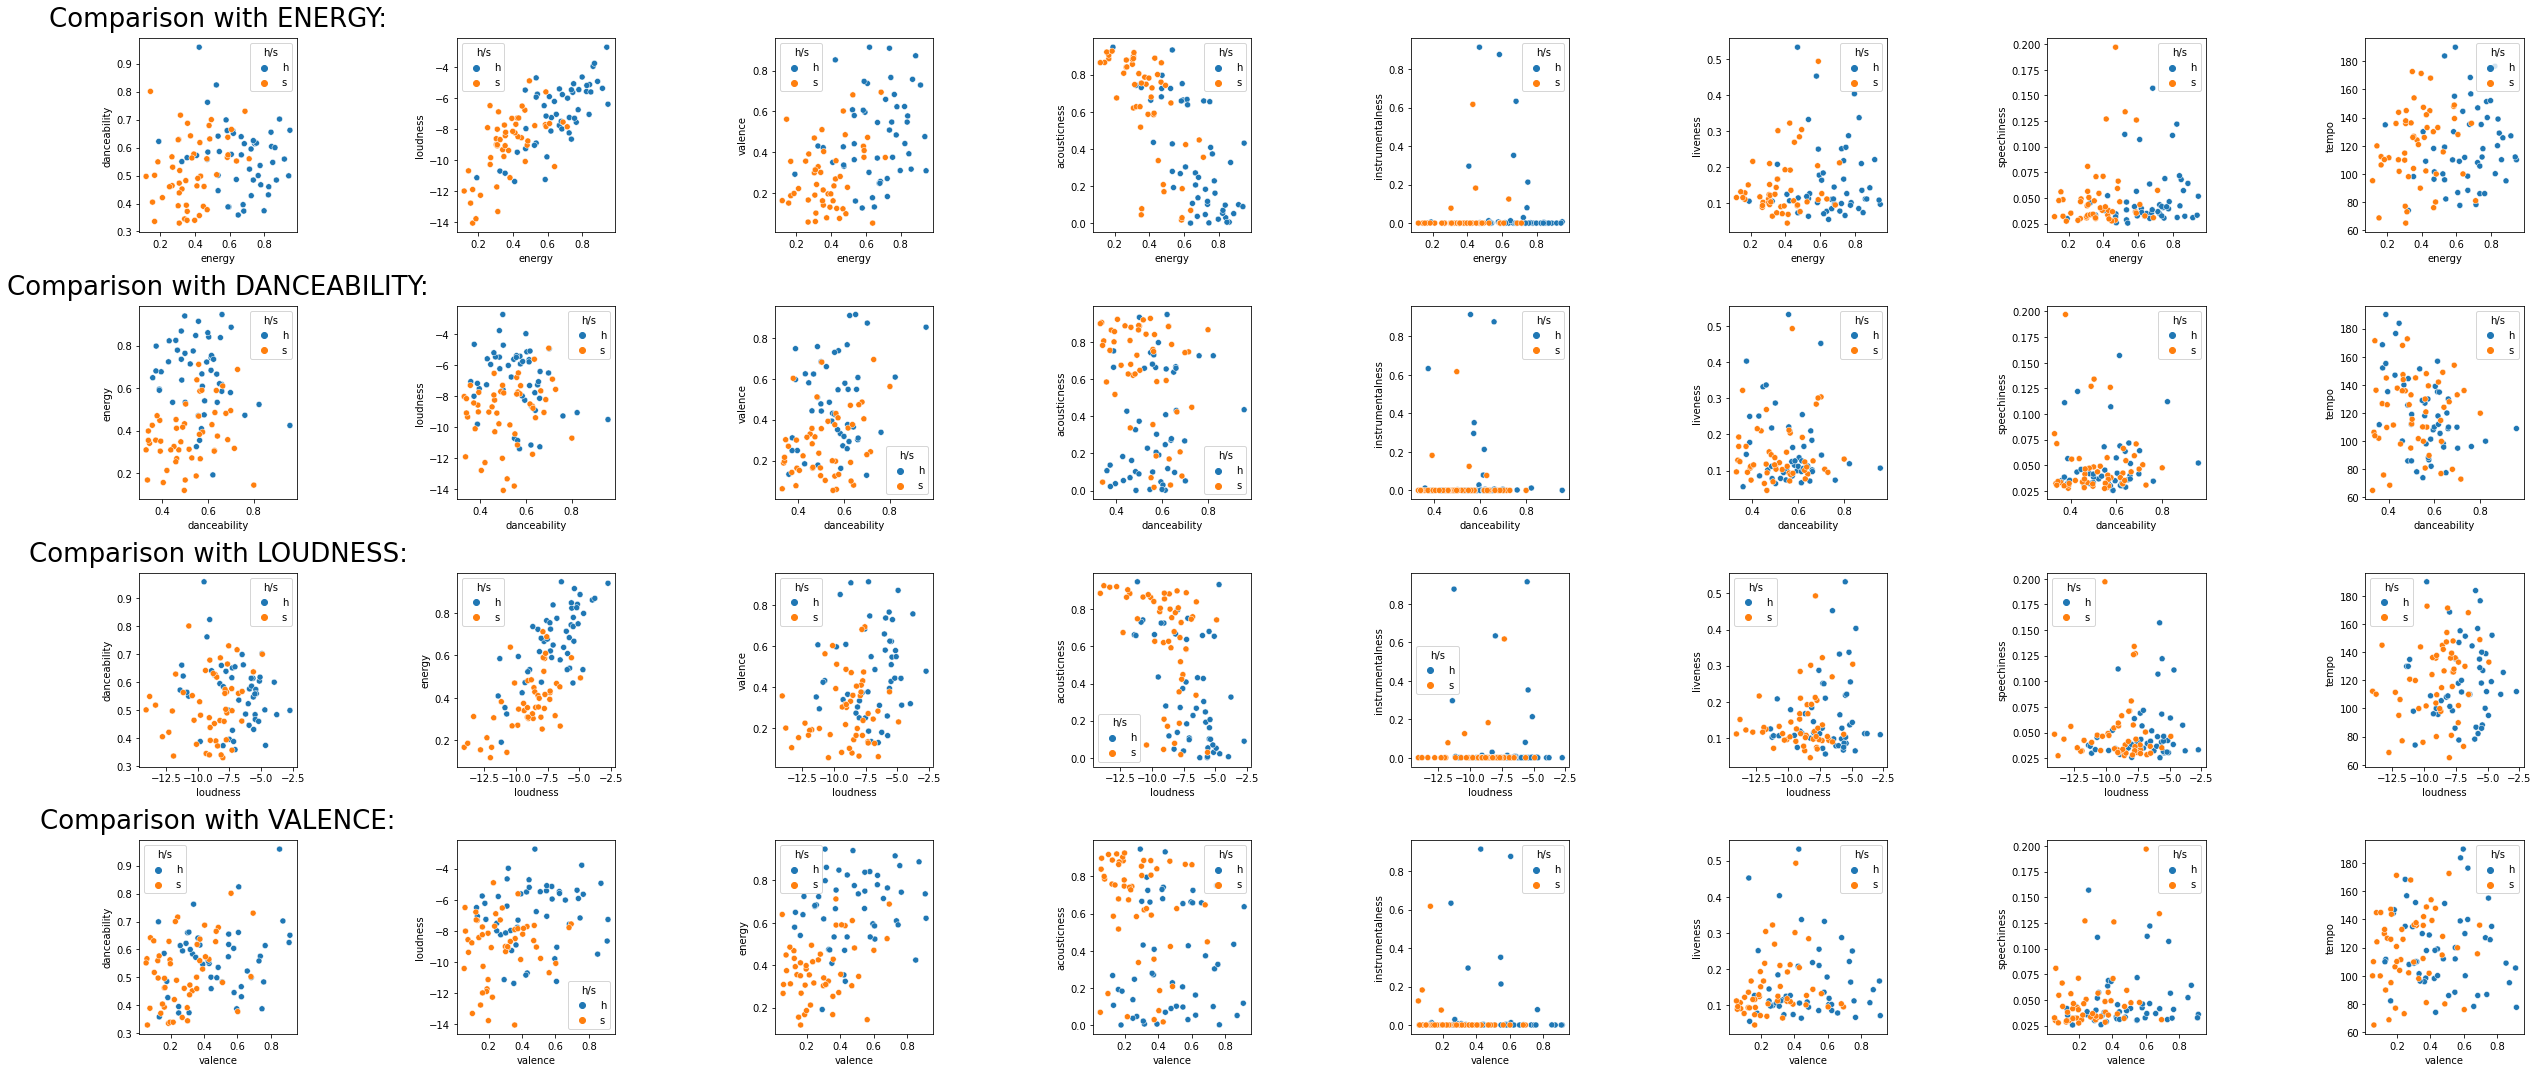

In [17]:
# plot
fig, ax = plt.subplots(4,8,figsize=(35,15))
g = sns.scatterplot(y="danceability", x="energy", hue="h/s", data=small_df, ax=ax[0][0])
g.set_title('Comparison with ENERGY:', fontdict={'fontsize':26}, pad=12)
g = sns.scatterplot(y="loudness", x="energy", hue="h/s", data=small_df, ax=ax[0][1])
g = sns.scatterplot(y="valence", x="energy", hue="h/s", data=small_df, ax=ax[0][2])
g = sns.scatterplot(y="acousticness", x="energy", hue="h/s", data=small_df, ax=ax[0][3])
g = sns.scatterplot(y="instrumentalness", x="energy", hue="h/s", data=small_df, ax=ax[0][4])
g = sns.scatterplot(y="liveness", x="energy", hue="h/s", data=small_df, ax=ax[0][5])
g = sns.scatterplot(y="speechiness", x="energy", hue="h/s", data=small_df, ax=ax[0][6])
g = sns.scatterplot(y="tempo", x="energy", hue="h/s", data=small_df, ax=ax[0][7])


g = sns.scatterplot(y="energy", x="danceability", hue="h/s", data=small_df, ax=ax[1][0])
g.set_title('Comparison with DANCEABILITY:', fontdict={'fontsize':26}, pad=12)
g = sns.scatterplot(y="loudness", x="danceability", hue="h/s", data=small_df, ax=ax[1][1])
g = sns.scatterplot(y="valence", x="danceability", hue="h/s", data=small_df, ax=ax[1][2])
g = sns.scatterplot(y="acousticness", x="danceability", hue="h/s", data=small_df, ax=ax[1][3])
g = sns.scatterplot(y="instrumentalness", x="danceability", hue="h/s", data=small_df, ax=ax[1][4])
g = sns.scatterplot(y="liveness", x="danceability", hue="h/s", data=small_df, ax=ax[1][5])
g = sns.scatterplot(y="speechiness", x="danceability", hue="h/s", data=small_df, ax=ax[1][6])
g = sns.scatterplot(y="tempo", x="danceability", hue="h/s", data=small_df, ax=ax[1][7])

g = sns.scatterplot(y="danceability", x="loudness", hue="h/s", data=small_df, ax=ax[2][0])
g.set_title('Comparison with LOUDNESS:', fontdict={'fontsize':26}, pad=12)
g = sns.scatterplot(y="energy", x="loudness", hue="h/s", data=small_df, ax=ax[2][1])
g = sns.scatterplot(y="valence", x="loudness", hue="h/s", data=small_df, ax=ax[2][2])
g = sns.scatterplot(y="acousticness", x="loudness", hue="h/s", data=small_df, ax=ax[2][3])
g = sns.scatterplot(y="instrumentalness", x="loudness", hue="h/s", data=small_df, ax=ax[2][4])
g = sns.scatterplot(y="liveness", x="loudness", hue="h/s", data=small_df, ax=ax[2][5])
g = sns.scatterplot(y="speechiness", x="loudness", hue="h/s", data=small_df, ax=ax[2][6])
g = sns.scatterplot(y="tempo", x="loudness", hue="h/s", data=small_df, ax=ax[2][7])

g = sns.scatterplot(y="danceability", x="valence", hue="h/s", data=small_df, ax=ax[3][0])
g.set_title('Comparison with VALENCE:', fontdict={'fontsize':26}, pad=12)
g = sns.scatterplot(y="loudness", x="valence", hue="h/s", data=small_df, ax=ax[3][1])
g = sns.scatterplot(y="energy", x="valence", hue="h/s", data=small_df, ax=ax[3][2])
g = sns.scatterplot(y="acousticness", x="valence", hue="h/s", data=small_df, ax=ax[3][3])
g = sns.scatterplot(y="instrumentalness", x="valence", hue="h/s", data=small_df, ax=ax[3][4])
g = sns.scatterplot(y="liveness", x="valence", hue="h/s", data=small_df, ax=ax[3][5])
g = sns.scatterplot(y="speechiness", x="valence", hue="h/s", data=small_df, ax=ax[3][6])
g = sns.scatterplot(y="tempo", x="valence", hue="h/s", data=small_df, ax=ax[3][7])

fig.tight_layout()

**Insights:**

From the above scatter plots, below are the list of observations that we were able to identify -

1. Instrumentalness is 0 almost for all songs and hence this feature can be dropped out.
2. Valence is spread out.
3. Danceability for most of the sad and happy songs lie between 0.45 to 0.75
4. Most songs are low on liveness and speechiness

## **Features and Labelled Dataset**

In [18]:
# Extracting Features and labels dataset

audio_features = cleaned_df.iloc[:, 0:-1]
audio_labels = cleaned_df.iloc[:, -1]

In [19]:
# Datasets count per label
print(df.groupby('h/s').size())

h/s
h    18160
s    18246
dtype: int64


## **SMOTE for Classification**

Since we see unbalanced datasets, the model will have hard time learning the decision boundaries between the classes. Hence, we are using SMOTE to balance the records across the labels. We are using imbalanced-learn Python library that provides different implementations of approaches to deal with imbalanced datasets. \

Smote will perform below steps: \
1) selecting a random example from the minority class \
2) finding the k (typically k=5) nearest neighbors of that example \
3) selecting a random example from those neighbors \
4) drawing a line between those two examples \
5) generating a synthetic example by choosing a random point from that line

Drawback of SMOTE: It doesnot have any knowledge regarding the underlying distribution. Therefore, some noisy samples can be generated. As a result, we concluded that we would be using other sampler that imbalanced-learn provides. Out of the two samplers, SMOTETomek and SMOTEENN, we chose to proceed ahead by using SMOTETomek.

In [20]:
from imblearn.combine import SMOTETomek
from collections import Counter
# Apply SMOTEENN to balance the dataset
smk = SMOTETomek()
X_res,y_res=smk.fit_resample(audio_features, audio_labels)

# New count after balancing -> {0: 900, 1: 895}
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({'h': 11818, 's': 11818})


## **Initial Model Run**

In [21]:
X_train, X_test, y_train, y_test = train_test_split(audio_features, audio_labels, test_size=0.3)
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_res, y_res, test_size=0.3)

### **Model Definitions**

In [22]:
# MODEL DEFINITIONS

def KNearnestNeighboursGRIDSearch(X,y):
    KNN=KNeighborsClassifier()

    parameters = {'n_neighbors': range(1, 20)}
    grid_searcher_knn = model_selection.GridSearchCV(KNN, parameters)
    grid_searcher_knn.fit(X, y)
    return grid_searcher_knn.best_params_['n_neighbors']

def LogRegression(X_train, X_test, y_train, y_test):
    LogReg=LogisticRegression(random_state=0)

    LogReg.fit(X_train,y_train)
    accuracy = metrics.accuracy_score(y_test, LogReg.predict(X_test))
    print("Logistic Regression Accuracy Score: ",accuracy)
    
    confuse = metrics.confusion_matrix(y_test, LogReg.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, LogReg.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    
def KNN(X_train, X_test, y_train, y_test,n_neighbors):
    KNN=KNeighborsClassifier(n_neighbors = n_neighbors)

    KNN.fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_test, KNN.predict(X_test))
    print("KNN Accuracy Score: ", accuracy)
    
    confuse = metrics.confusion_matrix(y_test, KNN.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, KNN.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    
def GaussNB(X_train, X_test, y_train, y_test):
    GNB=GaussianNB()

    GNB.fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_test, GNB.predict(X_test))
    print("Gaussian NB Accuracy Score: ", accuracy)
    
    confuse = metrics.confusion_matrix(y_test, GNB.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, GNB.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    
def SupportVectorClassifier(X_train, X_test, y_train, y_test):
    SVM=SVC()

    SVM.fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_test, SVM.predict(X_test))
    print("Support Vector Classifier Accuracy Score: ", accuracy)
    
    confuse = metrics.confusion_matrix(y_test, SVM.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, SVM.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    
def DecisionTree(X_train, X_test, y_train, y_test):
    DTC = DecisionTreeClassifier()

    DTC.fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_test, DTC.predict(X_test))
    print("Decision Tree Classifier Accuracy Score: ", accuracy)
    
    confuse = metrics.confusion_matrix(y_test, DTC.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, DTC.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    
def RandomForest(X_train, X_test, y_train, y_test):
    RFC = RandomForestClassifier()

    RFC.fit(X_train, y_train)
    accuracy = metrics.accuracy_score(y_test, RFC.predict(X_test))
    print("Random Forest Classifier Accuracy Score: ", accuracy)
    
    confuse = metrics.confusion_matrix(y_test, RFC.predict(X_test))
    print(confuse)
    print(metrics.classification_report(y_test, RFC.predict(X_test)))

    sns.heatmap(confuse)
    plt.show()
    

### **Running Models - Before ReSampling (i.e. w/o SMOTE)**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Accuracy Score:  0.6503988103285115
[[2937 1079]
 [1507 1874]]
              precision    recall  f1-score   support

           h       0.66      0.73      0.69      4016
           s       0.63      0.55      0.59      3381

    accuracy                           0.65      7397
   macro avg       0.65      0.64      0.64      7397
weighted avg       0.65      0.65      0.65      7397



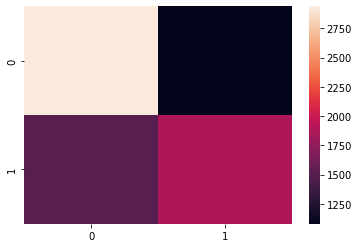

KNN Accuracy Score:  0.5999729620116263
[[2691 1325]
 [1634 1747]]
              precision    recall  f1-score   support

           h       0.62      0.67      0.65      4016
           s       0.57      0.52      0.54      3381

    accuracy                           0.60      7397
   macro avg       0.60      0.59      0.59      7397
weighted avg       0.60      0.60      0.60      7397



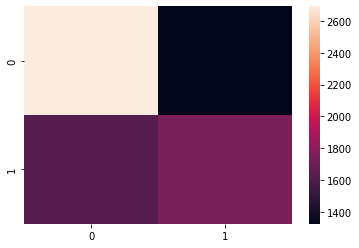

Gaussian NB Accuracy Score:  0.6337704474787076
[[3073  943]
 [1766 1615]]
              precision    recall  f1-score   support

           h       0.64      0.77      0.69      4016
           s       0.63      0.48      0.54      3381

    accuracy                           0.63      7397
   macro avg       0.63      0.62      0.62      7397
weighted avg       0.63      0.63      0.63      7397



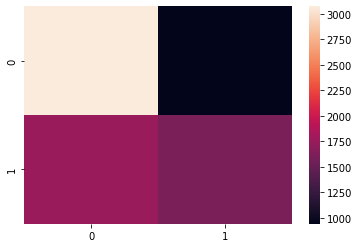

Support Vector Classifier Accuracy Score:  0.560767878869812
[[3233  783]
 [2466  915]]
              precision    recall  f1-score   support

           h       0.57      0.81      0.67      4016
           s       0.54      0.27      0.36      3381

    accuracy                           0.56      7397
   macro avg       0.55      0.54      0.51      7397
weighted avg       0.55      0.56      0.53      7397



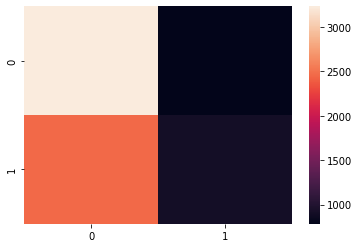

Decision Tree Classifier Accuracy Score:  0.5630661078815736
[[2432 1584]
 [1648 1733]]
              precision    recall  f1-score   support

           h       0.60      0.61      0.60      4016
           s       0.52      0.51      0.52      3381

    accuracy                           0.56      7397
   macro avg       0.56      0.56      0.56      7397
weighted avg       0.56      0.56      0.56      7397



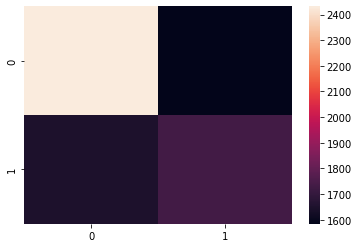

Random Forest Classifier Accuracy Score:  0.6317425983506827
[[2711 1305]
 [1419 1962]]
              precision    recall  f1-score   support

           h       0.66      0.68      0.67      4016
           s       0.60      0.58      0.59      3381

    accuracy                           0.63      7397
   macro avg       0.63      0.63      0.63      7397
weighted avg       0.63      0.63      0.63      7397



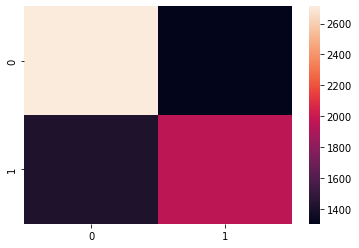

In [23]:
# Baseline Models: BEFORE SMOTE RESAMPLING

# Run a grid search to get the best value for n_neighbors for KNN
n_neighbors=KNearnestNeighboursGRIDSearch(audio_features,audio_labels)

LogRegression(X_train, X_test, y_train, y_test)
KNN(X_train, X_test, y_train, y_test,n_neighbors)
GaussNB(X_train, X_test, y_train, y_test)
SupportVectorClassifier(X_train, X_test, y_train, y_test)
DecisionTree(X_train, X_test, y_train, y_test)
RandomForest(X_train, X_test, y_train, y_test)

### **Running Models - After ReSampling (i.e. with SMOTE)**

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Accuracy Score:  0.6715554928782964
[[2454 1063]
 [1266 2308]]
              precision    recall  f1-score   support

           h       0.66      0.70      0.68      3517
           s       0.68      0.65      0.66      3574

    accuracy                           0.67      7091
   macro avg       0.67      0.67      0.67      7091
weighted avg       0.67      0.67      0.67      7091



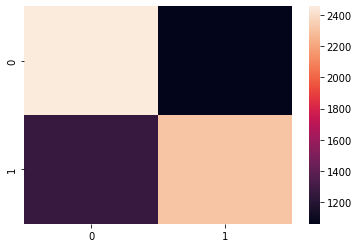

KNN Accuracy Score:  0.6412353687773233
[[2146 1371]
 [1173 2401]]
              precision    recall  f1-score   support

           h       0.65      0.61      0.63      3517
           s       0.64      0.67      0.65      3574

    accuracy                           0.64      7091
   macro avg       0.64      0.64      0.64      7091
weighted avg       0.64      0.64      0.64      7091



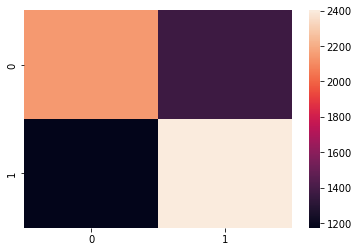

Gaussian NB Accuracy Score:  0.6434917501057679
[[2706  811]
 [1717 1857]]
              precision    recall  f1-score   support

           h       0.61      0.77      0.68      3517
           s       0.70      0.52      0.60      3574

    accuracy                           0.64      7091
   macro avg       0.65      0.64      0.64      7091
weighted avg       0.65      0.64      0.64      7091



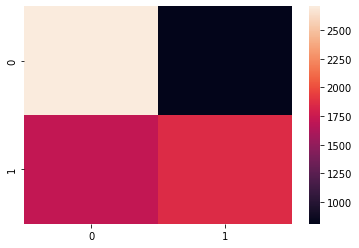

Support Vector Classifier Accuracy Score:  0.5849668593992384
[[2553  964]
 [1979 1595]]
              precision    recall  f1-score   support

           h       0.56      0.73      0.63      3517
           s       0.62      0.45      0.52      3574

    accuracy                           0.58      7091
   macro avg       0.59      0.59      0.58      7091
weighted avg       0.59      0.58      0.58      7091



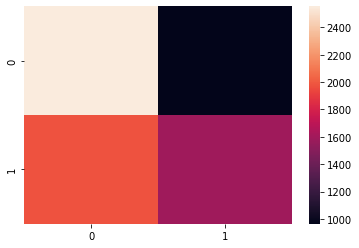

Decision Tree Classifier Accuracy Score:  0.5815822874065717
[[2099 1418]
 [1549 2025]]
              precision    recall  f1-score   support

           h       0.58      0.60      0.59      3517
           s       0.59      0.57      0.58      3574

    accuracy                           0.58      7091
   macro avg       0.58      0.58      0.58      7091
weighted avg       0.58      0.58      0.58      7091



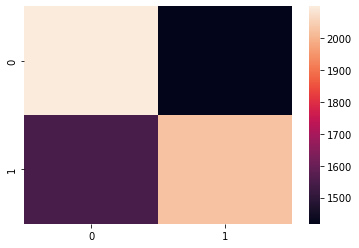

Random Forest Classifier Accuracy Score:  0.6721195882104075
[[2366 1151]
 [1174 2400]]
              precision    recall  f1-score   support

           h       0.67      0.67      0.67      3517
           s       0.68      0.67      0.67      3574

    accuracy                           0.67      7091
   macro avg       0.67      0.67      0.67      7091
weighted avg       0.67      0.67      0.67      7091



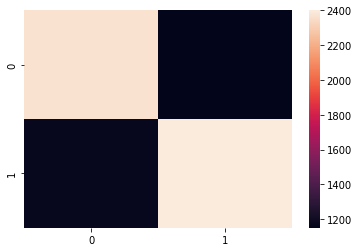

In [24]:
# Baseline Models: AFTER SMOTE RESAMPLING

# Run a grid search to get the best value for n_neighbors for KNN
n_neighbors=KNearnestNeighboursGRIDSearch(X_res,y_res)

LogRegression(X_train_res, X_test_res, y_train_res, y_test_res)
KNN(X_train_res, X_test_res, y_train_res, y_test_res,n_neighbors)
GaussNB(X_train_res, X_test_res, y_train_res, y_test_res)
SupportVectorClassifier(X_train_res, X_test_res, y_train_res, y_test_res)
DecisionTree(X_train_res, X_test_res, y_train_res, y_test_res)
RandomForest(X_train_res, X_test_res, y_train_res, y_test_res)

### **Comparison of Model results Before and After Resampling using SMOTE**

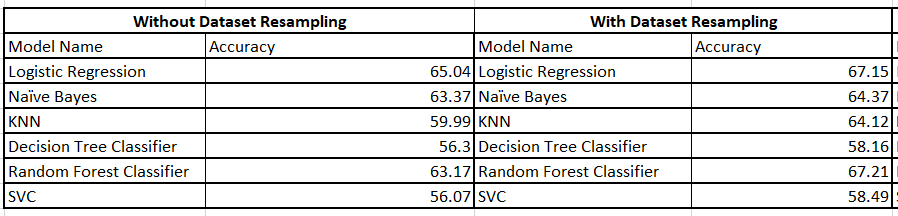

## **Scaling of the Data**

In [25]:
# Using Sampled features and labels generated after SMOTE
audio_features = X_res
audio_labels = y_res
scaler = StandardScaler()
scaler.fit(audio_features)
scaled_data = scaler.transform(audio_features)
audio_features_scaled = scaled_data
X_train, X_test, y_train, y_test = train_test_split(audio_features_scaled, audio_labels, test_size=0.3)

### **Running Models**

Logistic Regression Accuracy Score:  0.6619658722324073
[[2421 1080]
 [1317 2273]]
              precision    recall  f1-score   support

           h       0.65      0.69      0.67      3501
           s       0.68      0.63      0.65      3590

    accuracy                           0.66      7091
   macro avg       0.66      0.66      0.66      7091
weighted avg       0.66      0.66      0.66      7091



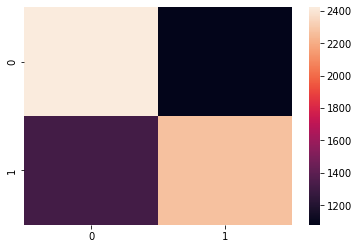

KNN Accuracy Score:  0.6111972923424058
[[2106 1395]
 [1362 2228]]
              precision    recall  f1-score   support

           h       0.61      0.60      0.60      3501
           s       0.61      0.62      0.62      3590

    accuracy                           0.61      7091
   macro avg       0.61      0.61      0.61      7091
weighted avg       0.61      0.61      0.61      7091



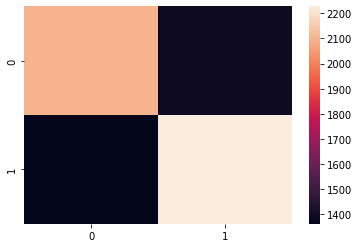

Gaussian NB Accuracy Score:  0.644055845437879
[[2690  811]
 [1713 1877]]
              precision    recall  f1-score   support

           h       0.61      0.77      0.68      3501
           s       0.70      0.52      0.60      3590

    accuracy                           0.64      7091
   macro avg       0.65      0.65      0.64      7091
weighted avg       0.66      0.64      0.64      7091



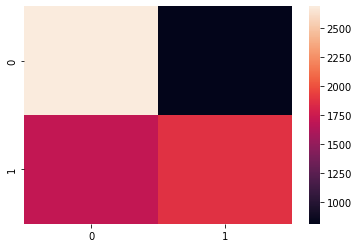

Support Vector Classifier Accuracy Score:  0.7015935693132139
[[2441 1060]
 [1056 2534]]
              precision    recall  f1-score   support

           h       0.70      0.70      0.70      3501
           s       0.71      0.71      0.71      3590

    accuracy                           0.70      7091
   macro avg       0.70      0.70      0.70      7091
weighted avg       0.70      0.70      0.70      7091



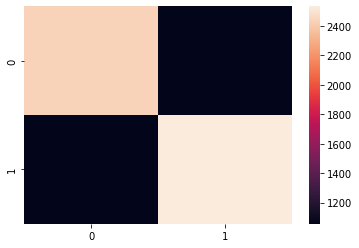

Decision Tree Classifier Accuracy Score:  0.5848258355662107
[[2142 1359]
 [1585 2005]]
              precision    recall  f1-score   support

           h       0.57      0.61      0.59      3501
           s       0.60      0.56      0.58      3590

    accuracy                           0.58      7091
   macro avg       0.59      0.59      0.58      7091
weighted avg       0.59      0.58      0.58      7091



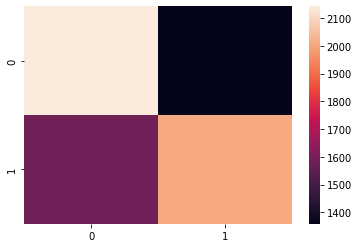

Random Forest Classifier Accuracy Score:  0.6760682555351855
[[2374 1127]
 [1170 2420]]
              precision    recall  f1-score   support

           h       0.67      0.68      0.67      3501
           s       0.68      0.67      0.68      3590

    accuracy                           0.68      7091
   macro avg       0.68      0.68      0.68      7091
weighted avg       0.68      0.68      0.68      7091



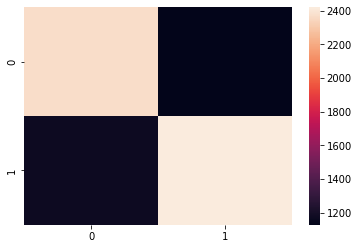

In [26]:
# Baseline Models: Need to run this for every dataset

# Run a grid search to get the best value for n_neighbors for KNN
n_neighbors=KNearnestNeighboursGRIDSearch(audio_features,audio_labels)

LogRegression(X_train, X_test, y_train, y_test)
KNN(X_train, X_test, y_train, y_test,n_neighbors)
GaussNB(X_train, X_test, y_train, y_test)
SupportVectorClassifier(X_train, X_test, y_train, y_test)
DecisionTree(X_train, X_test, y_train, y_test)
RandomForest(X_train, X_test, y_train, y_test)

### **Model results: Before Sampling Vs After Resampling using SMOTE Vs SMOTE ReSampling + Standard Scaling**

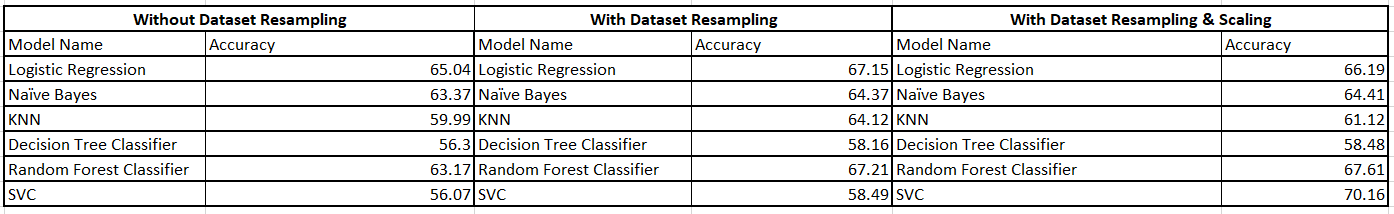

## **Overfitting of the Model**

### **KNN Model : Overfitting**

>1, train: 0.953, test: 0.611
>10, train: 0.736, test: 0.676
>20, train: 0.720, test: 0.689
>30, train: 0.712, test: 0.692
>40, train: 0.708, test: 0.689
>50, train: 0.707, test: 0.693


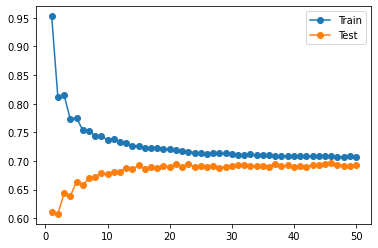

In [27]:
from sklearn.metrics import accuracy_score
train_accuracy_scores = list()
test_accuracy_scores = list()
neighbours = [i for i in range(1, 51)]
for neighbour_count in neighbours:
	KNN = KNeighborsClassifier(n_neighbors = neighbour_count)
	KNN.fit(X_train, y_train)
	train_predictions = KNN.predict(X_train)
	train_accuracy = accuracy_score(y_train, train_predictions)
	train_accuracy_scores.append(train_accuracy)
	test_predictions = KNN.predict(X_test)
	test_accuracy = accuracy_score(y_test, test_predictions)
	test_accuracy_scores.append(test_accuracy)
	if neighbour_count % 10 == 0 or neighbour_count==1:
		print('>%d, train: %.3f, test: %.3f' % (neighbour_count, train_accuracy, test_accuracy))
plt.plot(neighbours, train_accuracy_scores, '-o', label='Train')
plt.plot(neighbours, test_accuracy_scores, '-o', label='Test')
plt.legend()
plt.show()

### **Decision Tree Model : Overfitting**

>1, train: 0.636, test: 0.636
>10, train: 0.755, test: 0.651
>20, train: 0.932, test: 0.595
>30, train: 0.953, test: 0.588
>40, train: 0.953, test: 0.589
>50, train: 0.953, test: 0.587


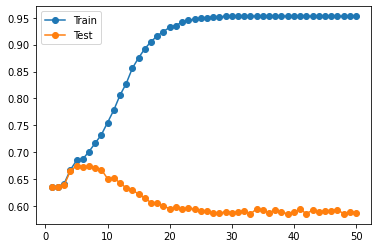

In [28]:
train_accuracy_scores = list()
test_accuracy_scores = list()
depth_values = [i for i in range(1, 51)]
for depth_value in depth_values:
	DTC = DecisionTreeClassifier(max_depth=depth_value)
	DTC.fit(X_train, y_train)
	train_predictions = DTC.predict(X_train)
	train_accuracy = accuracy_score(y_train, train_predictions)
	train_accuracy_scores.append(train_accuracy)
	test_predictions = DTC.predict(X_test)
	test_accuracy = accuracy_score(y_test, test_predictions)
	test_accuracy_scores.append(test_accuracy)
	if depth_value % 10 == 0 or depth_value==1:
		print('>%d, train: %.3f, test: %.3f' % (depth_value, train_accuracy, test_accuracy))
plt.plot(depth_values, train_accuracy_scores, '-o', label='Train')
plt.plot(depth_values, test_accuracy_scores, '-o', label='Test')
plt.legend()
plt.show()

### **RFC Model : Overfitting (Using NEstimator hyperparameter)**

>1, train: 0.832, test: 0.593
>10, train: 0.942, test: 0.645
>20, train: 0.950, test: 0.659
>30, train: 0.952, test: 0.666
>40, train: 0.952, test: 0.665
>50, train: 0.953, test: 0.665
>60, train: 0.953, test: 0.673
>70, train: 0.953, test: 0.675
>80, train: 0.953, test: 0.675
>90, train: 0.953, test: 0.675
>100, train: 0.953, test: 0.677


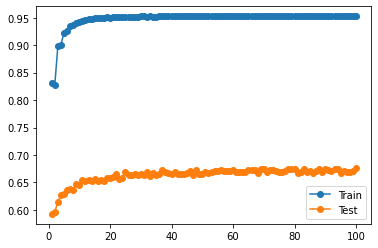

In [29]:
train_accuracy_scores = list()
test_accuracy_scores = list()
estimator_values = [i for i in range(1, 101)]
for estimator_value in estimator_values:
	RFC = RandomForestClassifier(n_estimators=estimator_value)
	RFC.fit(X_train, y_train)
	train_predictions = RFC.predict(X_train)
	train_accuracy = accuracy_score(y_train, train_predictions)
	train_accuracy_scores.append(train_accuracy)
	test_predictions = RFC.predict(X_test)
	test_accuracy = accuracy_score(y_test, test_predictions)
	test_accuracy_scores.append(test_accuracy)
	if estimator_value % 10 == 0 or estimator_value==1:
		print('>%d, train: %.3f, test: %.3f' % (estimator_value, train_accuracy, test_accuracy))
plt.plot(estimator_values, train_accuracy_scores, '-o', label='Train')
plt.plot(estimator_values, test_accuracy_scores, '-o', label='Test')
plt.legend()
plt.show()

### **RFC Model : Overfitting (Using MAX Depth hyperparameter)**

>1, train: 0.312, test: 0.296
>10, train: 0.874, test: 0.590
>20, train: 0.983, test: 0.667
>30, train: 0.983, test: 0.655
>40, train: 0.983, test: 0.667
>50, train: 0.983, test: 0.662
>60, train: 0.983, test: 0.646
>70, train: 0.983, test: 0.646
>80, train: 0.983, test: 0.667
>90, train: 0.983, test: 0.655
>100, train: 0.983, test: 0.652


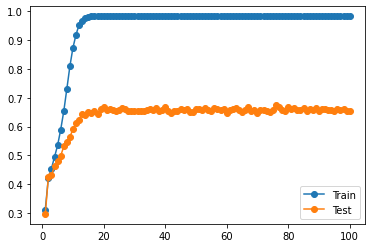

In [ ]:
train_accuracy_scores = list()
test_accuracy_scores = list()
depth_values = [i for i in range(1, 101)]
for depth_value in depth_values:
	RFC = RandomForestClassifier(max_depth=depth_value)
	RFC.fit(X_train, y_train)
	train_predictions = RFC.predict(X_train)
	train_accuracy = accuracy_score(y_train, train_predictions)
	train_accuracy_scores.append(train_accuracy)
	test_predictions = RFC.predict(X_test)
	test_accuracy = accuracy_score(y_test, test_predictions)
	test_accuracy_scores.append(test_accuracy)
	if depth_value % 10 == 0 or depth_value==1:
		print('>%d, train: %.3f, test: %.3f' % (depth_value, train_accuracy, test_accuracy))
plt.plot(depth_values, train_accuracy_scores, '-o', label='Train')
plt.plot(depth_values, test_accuracy_scores, '-o', label='Test')
plt.legend()
plt.show()

## **SYNTHETIC DATASET**

We have prepared a different ipynb script that shows how th esynthetic dataset is being generated for our model.

## **NEXT STEPS**

We have tested several models like SVC, KNN, RFC, DecisionTree, GNB on this dataset to understand the underlying patterns and structure of the dataset. As a part of next steps we plan to perform below steps - 

1. Improve RFC parameters and test RFC model
2. Improve SVC parameters and test SVC model
3. Implement PCA and test the model
4. Analytize and compare these different implemntations
5. Implement Artificial Neural Network and analye the performance of the ANN vs rest of the models.


## **Features Definitions from Spotify Webpage.**

The below definitions of different audio features have been copy/paste from Spotify Webpage.


**Spotify Audio Features:**
Spotify uses a series of different features to classify tracks. I copy/paste the information from the Spotify Webpage.

**Acousticness:** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Energy:** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**Instrumentalness:** Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness:** Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides a strong likelihood that the track is live.
Loudness: the overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing the relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**Speechiness:** Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audiobook, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Valence:** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Tempo:** The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, the tempo is the speed or pace of a given piece and derives directly from the average beat duration.